<a href="https://colab.research.google.com/github/kunal-kumar-chaudhary/Global-AI-Challenge/blob/main/Global_AI_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
# loading our data
train = pd.read_csv("training data.csv")
test = pd.read_csv("testing data.csv")

In [396]:
train.head(3)

,Unnamed: 0,Unnamed: 0.1,Smiles,Active,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,descriptors
0,0,0,COc1ccc2[nH]cc(CCN)c2c1,False,190.110613,190.246,3.0,3.0,3.0,2.0,2.0,14.0,28.0,3.0,0.0,0.272727,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,82.870490,51.04,1.6777,57.6091,8.209213,4.689558,2.388265,2.388265,1.646830,8.209213,4.689558,2.388265,2.388265,1.646830,-1.48,9.089833,3.717081,1.463957,2.413403,[190.11061307 190.246 3. 3. ...
1,1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False,255.138992,255.789,2.0,1.0,3.0,1.0,2.0,17.0,39.0,3.0,0.0,0.571429,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,110.052270,23.47,3.4034,74.0608,11.248564,6.305936,3.386963,3.386963,2.625667,10.432068,6.305936,3.386963,3.386963,2.625667,-0.73,14.331463,6.873090,3.896375,5.794202,[255.138992 255.789 2. 1. ...
2,2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False,413.115775,413.459,9.0,2.0,4.0,2.0,7.0,29.0,48.0,10.0,1.0,0.210526,4.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,167.168437,115.73,1.2597,106.2045,16.210137,10.432690,6.776768,6.776768,4.729780,15.393641,8.992626,4.882131,4.882131,3.271715,-3.08,19.245735,7.740178,3.770959,5.136739,[ 4.13115775e+02 4.13459000e+02 9.00000000e+...


In [397]:
test.head(3)

,Unnamed: 0,Unnamed: 0.1,Smiles,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,descriptors
0,0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,528.259737,528.617,11.0,1.0,6.0,1.0,10.0,39.0,71.0,11.0,1.0,0.392857,6.0,4.0,2.0,2.0,5.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,226.319219,110.53,3.7403,147.6037,21.992704,13.323531,7.351116,7.351116,5.266717,21.992704,13.323531,7.351116,7.351116,5.266717,-4.09,25.202404,11.339826,5.545201,7.327971,[ 5.28259737e+02 5.28617000e+02 1.10000000e+...
1,1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,269.060742,269.731,2.0,0.0,3.0,0.0,2.0,19.0,31.0,3.0,0.0,0.062500,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,115.783966,22.00,4.1555,77.8795,10.969965,6.430304,3.464525,3.464525,2.412406,10.214036,6.052339,3.212548,3.212548,2.286418,-2.06,11.998587,4.902237,2.269970,3.095785,[ 2.69060742e+02 2.69731000e+02 2.00000000e+...
2,2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,257.101171,257.246,8.0,8.0,5.0,7.0,7.0,18.0,33.0,8.0,1.0,0.300000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,102.639380,148.07,-1.7562,61.4800,9.420717,5.089219,2.237368,2.237368,1.155580,9.420717,5.089219,2.237368,2.237368,1.155580,-2.03,14.032617,6.052775,3.230833,4.718682,[257.10117058 257.246 8. 8. ...


In [398]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       5557 non-null   int64  
 1   Unnamed: 0.1                     5557 non-null   int64  
 2   Smiles                           5557 non-null   object 
 3   Active                           5557 non-null   bool   
 4   exactmw                          5557 non-null   float64
 5   amw                              5557 non-null   float64
 6   lipinskiHBA                      5557 non-null   float64
 7   lipinskiHBD                      5557 non-null   float64
 8   NumRotatableBonds                5557 non-null   float64
 9   NumHBD                           5557 non-null   float64
 10  NumHBA                           5557 non-null   float64
 11  NumHeavyAtoms                    5557 non-null   float64
 12  NumAtoms            

In [399]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1614 non-null   int64  
 1   Unnamed: 0.1                     1614 non-null   int64  
 2   Smiles                           1614 non-null   object 
 3   exactmw                          1614 non-null   float64
 4   amw                              1614 non-null   float64
 5   lipinskiHBA                      1614 non-null   float64
 6   lipinskiHBD                      1614 non-null   float64
 7   NumRotatableBonds                1614 non-null   float64
 8   NumHBD                           1614 non-null   float64
 9   NumHBA                           1614 non-null   float64
 10  NumHeavyAtoms                    1614 non-null   float64
 11  NumAtoms                         1614 non-null   float64
 12  NumHeteroatoms      

In [400]:
train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Smiles'], inplace=True)
test.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Smiles'], inplace=True)

In [401]:
train.drop(columns=['descriptors'], inplace=True)
test.drop(columns=['descriptors'], inplace=True)

In [402]:
test.columns.value_counts().sum()

43

In [403]:
train.columns.value_counts().sum()

44

In [404]:
train.columns

Index(['Active', 'exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD',
       'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms',
       'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n',
       'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2',
       'kappa3', 'Phi'],
      dtype='object')

In [405]:
test.columns

Index(['exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds',
       'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms',
       'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings',
       'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles',
       'NumAromaticHeterocycles', 'NumSaturatedHeterocycles',
       'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms',
       'NumAtomStereoCenters', 'NumUnspecifiedAtomStereoCenters', 'labuteASA',
       'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v',
       'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha',
       'kappa1', 'kappa2', 'kappa3', 'Phi'],
      dtype='object')

In [406]:
# we need to seperate our data into indepdent and dependent variable before feature scaling.
for i in train.columns:
  if i not in test.columns:
    print(i)

Active


In [407]:
train_y = train['Active']
train_x = train.drop(columns=['Active'])

In [408]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_y)

### Feature scaling

In [409]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test = sc.transform(test)

### Principal Component Analysis

In [410]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
train_pca = pca.fit_transform(train_x)
test_pca = pca.transform(test)

In [411]:
train_pca

array([[-4.58015651e+00, -5.53559453e-01,  2.58483740e-01, ...,
        -7.73108787e-02, -3.20263444e-02, -2.39306582e-02],
       [-3.00356690e+00,  1.58363750e+00,  6.97581993e-01, ...,
         6.63440144e-02,  1.85991685e-02,  3.77429536e-02],
       [ 1.28638174e+00, -3.67948739e-01, -5.12212359e-01, ...,
        -7.52031530e-02, -4.38172521e-02,  1.50528403e-01],
       ...,
       [-6.02558242e+00, -3.95429809e-01, -3.26395580e-01, ...,
        -2.01450333e-03,  3.57057868e-02,  1.94103773e-02],
       [ 2.34308668e+00,  2.95294747e-01, -2.11930854e+00, ...,
         2.00690306e-02,  1.27669073e-01,  1.58136407e-02],
       [-2.77960670e+00, -8.81094662e-01,  8.76435238e-01, ...,
        -2.58684694e-02, -1.19808455e-01,  7.97131931e-02]])

In [412]:
test_pca

array([[ 5.20870649e+00,  5.80678518e-01, -2.57920047e+00, ...,
        -2.81842998e-02,  1.59940277e-02,  1.06998003e-01],
       [-3.50541509e+00, -3.21959556e-01, -1.87890329e+00, ...,
        -4.17793454e-03,  4.54743155e-02,  1.09795863e-02],
       [-2.69462740e+00, -2.44931285e+00,  3.76769301e+00, ...,
         1.81101402e-02, -5.30082785e-02,  8.61194245e-04],
       ...,
       [ 3.48906596e+00,  3.78936652e+00,  9.02246626e-01, ...,
         3.87752119e-02,  8.76439481e-02, -2.93708535e-02],
       [-1.72090727e+00, -1.63704714e+00, -1.07780979e+00, ...,
        -9.40076947e-02, -9.63040426e-02, -2.99837675e-02],
       [-1.36207337e+00, -7.82118979e-02, -9.55403891e-01, ...,
         9.76566607e-02, -4.49556479e-03, -5.01673769e-02]])

### Train Test Split

In [413]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_pca, train_y, test_size=0.2,
                                                  random_state=42, stratify=train_y)

startifying the data will put out the data with balanced number of classes in both validation and training set. let's verify this thing..

In [414]:
df1 = pd.DataFrame(y_train, columns=['Active'])
df2 = pd.DataFrame(y_val, columns=['Active'])

In [415]:
df1.head()

,Active
0,0
1,0
2,0
3,0
4,0


In [416]:
df2.head()

,Active
0,0
1,0
2,0
3,0
4,0


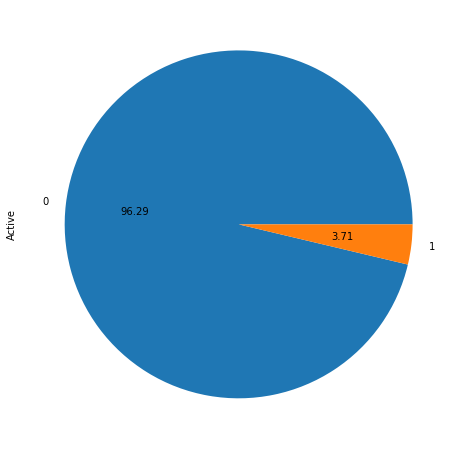

In [417]:
plt.figure(figsize=(10,8))
df1['Active'].value_counts().plot.pie(autopct="%.2f")

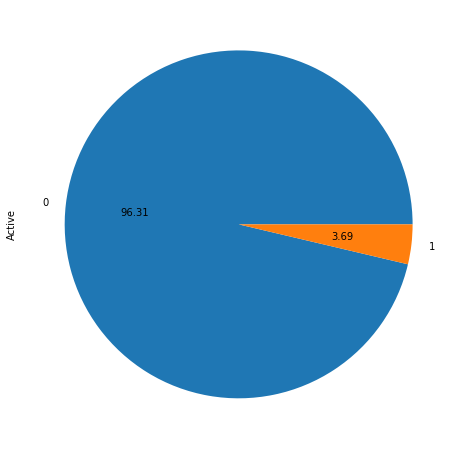

In [418]:
plt.figure(figsize=(10,8))
df2['Active'].value_counts().plot.pie(autopct="%.2f")

from above pie charts, we can see that the percentage of class distribution is same in both training as well as validation data.
we do `stratification` in case our data is imbalanced.

### Random Oversampling

as our dataset is imbalanced, we will apply Random OverSampling to generate redundant rows which will not contribute to the predictions, but will definitely help us deal with imbalanced class.

In [419]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
ruc = SMOTE(sampling_strategy=1)
""" 
this will provide us with the classes in equal ratio. 
we can change the value of sampling_strategy to change class number ratio.
"""
x_res, y_res = ruc.fit_resample(x_train, y_train)

In [420]:
x_res

array([[ 9.03226421e+00,  6.44200277e+00,  5.19837006e-01, ...,
        -4.61984019e-02,  4.69441235e-02, -1.44483137e-01],
       [ 2.57687187e+00,  1.65477844e+00,  1.12771949e+00, ...,
        -6.12462976e-02,  9.82799387e-02, -4.82024358e-02],
       [-2.44125953e-01,  5.00081838e+00,  2.74292768e-01, ...,
        -2.17568828e-02,  5.97422279e-02,  5.32179982e-02],
       ...,
       [ 2.63457867e+00, -9.00753144e-01,  3.95082981e-01, ...,
         7.97316475e-03, -1.15171660e-01,  7.61643835e-02],
       [-3.29400265e+00, -1.28391601e+00, -8.59670709e-02, ...,
        -8.72504651e-03,  1.63569935e-02,  7.80440446e-02],
       [ 3.74351748e+00, -1.46452120e-02, -1.26832390e+00, ...,
         1.43557734e-02,  8.24205665e-03, -4.72064250e-02]])

In [421]:
y_res

array([0, 0, 0, ..., 1, 1, 1])

# XGBoost

In [422]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(x_res, y_res)

XGBClassifier()

In [423]:
from sklearn.metrics import f1_score
y_pred = XGB.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.14705882352941174

In [424]:
original_prediction = XGB.predict(test_pca)

In [425]:
original_prediction

array([1, 1, 1, ..., 0, 0, 0])

In [427]:
df = pd.read_csv("submission_4.csv")

In [428]:
df['Active'] = original_prediction
df.head()

,Unnamed: 0,Smiles,Active
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,1
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,1
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,1
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,1
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,0


In [429]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Smiles,Active
0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,1
1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,1
2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,1
3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,1
4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,0


In [430]:
df.to_csv("final_submission_4.csv")